In [146]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

# Data Analysis with Python: Zero to Pandas - Course Project

- Project: Data Analysis with Python: Zero to Pandas - Course Project 
= Dataset used: [Netflix Original Films & IMDB Scores](https://www.kaggle.com/datasets/luiscorter/netflix-original-films-imdb-scores) from Kaggle
- Goal: Perform data cleaning, EDA and visualization on the data.

This notebook is also the Course Project of the course [Data Analysis with Python: Zero to Pandas](zerotopandas.com). 

## Downloading the Dataset

I'm running this notebook via Jupyter Notebook locally. Let's download the dataset to my local folder.

1. Download Kaggle dataset to local using opendatasets library
2. Inspect the dataset folder using listdir from os library

In [147]:
!pip install jovian opendatasets --upgrade --quiet

You should consider upgrading via the 'C:\Users\USER\AppData\Local\Programs\Python\Python310\python.exe -m pip install --upgrade pip' command.


Let's begin by downloading the data, and listing the files within the dataset.

In [148]:
path = "https://www.kaggle.com/datasets/luiscorter/netflix-original-films-imdb-scores" 

In [172]:
import opendatasets as od
od.download(path)

Skipping, found downloaded files in ".\netflix-original-films-imdb-scores" (use force=True to force download)


The dataset has been downloaded and extracted.

In [173]:
data_dir = "./netflix-original-films-imdb-scores"

In [174]:
import os
os.listdir(data_dir)

['NetflixOriginals.csv']

Let us save and upload our work to Jovian before continuing.

In [175]:
project_name = "zerotopandas-course-project-starter" # change this (use lowercase letters and hyphens only)

In [ ]:
!pip install jovian --upgrade -q

In [ ]:
import jovian

In [ ]:
jovian.commit(project=project_name)

## Data Preparation and Cleaning




In [176]:
csv_path = "./netflix-original-films-imdb-scores/NetflixOriginals.csv"
df = pd.read_csv(csv_path, sep=",")
df.head()

UnicodeDecodeError: 'utf-8' codec can't decode byte 0xd2 in position 7431: invalid continuation byte

In [177]:
# hmm.. seem like we're having UnicodeDecodeError for the csv we used
# let's solve it

# insect the character encoding of csv
!pip install chardet
import chardet
with open(csv_path, "rb") as r:
    result = chardet.detect(r.read(100000))
print(result)

# define encoding in pd.read_csv
df = pd.read_csv(csv_path, encoding="Windows-1252")

You should consider upgrading via the 'C:\Users\USER\AppData\Local\Programs\Python\Python310\python.exe -m pip install --upgrade pip' command.


{'encoding': 'Windows-1252', 'confidence': 0.73, 'language': ''}


In [180]:
# UnicodeDecodeError resolved. Display first 5 rows of dataframe
df.head()

,Title,Genre,Premiere,Runtime,IMDB Score,Language
0,Enter the Anime,Documentary,"August 5, 2019",58,2.5,English/Japanese
1,Dark Forces,Thriller,"August 21, 2020",81,2.6,Spanish
2,The App,Science fiction/Drama,"December 26, 2019",79,2.6,Italian
3,The Open House,Horror thriller,"January 19, 2018",94,3.2,English
4,Kaali Khuhi,Mystery,"October 30, 2020",90,3.4,Hindi


In [181]:
# about the shape and size of dataframe
print(f"Shape: {df.shape}")
print(f"Number of rows: {df.shape[0]}")
print(f"Number of columns: {df.shape[1]}")
print(f"Columns: {list(df.columns)}")

Shape: (584, 6)
Number of rows: 584
Number of columns: 6
Columns: ['Title', 'Genre', 'Premiere', 'Runtime', 'IMDB Score', 'Language']


In [182]:
# split into numerical features and categorical features
df_numerical = df.select_dtypes(include="number")
df_categorical = df.select_dtypes(include="object")

print(f"Numerical Columns: {list(df_numerical.columns)}")
print(f"Categorical Columns: {list(df_categorical.columns)}")

Numerical Columns: ['Runtime', 'IMDB Score']
Categorical Columns: ['Title', 'Genre', 'Premiere', 'Language']


In [183]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 584 entries, 0 to 583
Data columns (total 6 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   Title       584 non-null    object 
 1   Genre       584 non-null    object 
 2   Premiere    584 non-null    object 
 3   Runtime     584 non-null    int64  
 4   IMDB Score  584 non-null    float64
 5   Language    584 non-null    object 
dtypes: float64(1), int64(1), object(4)
memory usage: 27.5+ KB


Observation: There's no empty value in all columns.

In [184]:
# number of unique values in all columns
for col in df.columns:
    print(f"Column {col} has {df[col].nunique()} unique values.")

Column Title has 584 unique values.
Column Genre has 115 unique values.
Column Premiere has 390 unique values.
Column Runtime has 124 unique values.
Column IMDB Score has 54 unique values.
Column Language has 38 unique values.


Observation: This dataset consists of 584 unique movies.  

In [185]:
# parse column Premiere into datetime with format yyyy/mm/dd
df["Premiere"] = pd.to_datetime(df["Premiere"], infer_datetime_format=True)
df.head()

,Title,Genre,Premiere,Runtime,IMDB Score,Language
0,Enter the Anime,Documentary,2019-08-05,58,2.5,English/Japanese
1,Dark Forces,Thriller,2020-08-21,81,2.6,Spanish
2,The App,Science fiction/Drama,2019-12-26,79,2.6,Italian
3,The Open House,Horror thriller,2018-01-19,94,3.2,English
4,Kaali Khuhi,Mystery,2020-10-30,90,3.4,Hindi


In [186]:
# Premiere column has datetime value
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 584 entries, 0 to 583
Data columns (total 6 columns):
 #   Column      Non-Null Count  Dtype         
---  ------      --------------  -----         
 0   Title       584 non-null    object        
 1   Genre       584 non-null    object        
 2   Premiere    584 non-null    datetime64[ns]
 3   Runtime     584 non-null    int64         
 4   IMDB Score  584 non-null    float64       
 5   Language    584 non-null    object        
dtypes: datetime64[ns](1), float64(1), int64(1), object(3)
memory usage: 27.5+ KB


In [130]:
import jovian

In [131]:
jovian.commit()

<IPython.core.display.Javascript object>

[jovian] Please enter your API key ( from https://jovian.ai/ ):
API KEY:


Abort: 

## Exploratory Analysis and Visualization





Let's begin by importing`matplotlib.pyplot` and `seaborn`.

In [187]:
df_numerical.describe()

,Runtime,IMDB Score
count,584.000000,584.000000
mean,93.577055,6.271747
std,27.761683,0.979256
min,4.000000,2.500000
25%,86.000000,5.700000
50%,97.000000,6.350000
75%,108.000000,7.000000
max,209.000000,9.000000


In [188]:
df_categorical.describe()

,Title,Genre,Premiere,Language
count,584,584,584,584
unique,584,115,390,38
top,Enter the Anime,Documentary,"October 2, 2020",English
freq,1,159,6,401


### Retrieve Multiple Genres 

In [189]:
df["Genre"].unique()

array(['Documentary', 'Thriller', 'Science fiction/Drama',
       'Horror thriller', 'Mystery', 'Action', 'Comedy',
       'Heist film/Thriller', 'Musical/Western/Fantasy', 'Drama',
       'Romantic comedy', 'Action comedy', 'Horror anthology',
       'Political thriller', 'Superhero-Comedy', 'Horror',
       'Romance drama', 'Anime / Short', 'Superhero', 'Heist', 'Western',
       'Animation/Superhero', 'Family film', 'Action-thriller',
       'Teen comedy-drama', 'Romantic drama', 'Animation',
       'Aftershow / Interview', 'Christmas musical',
       'Science fiction adventure', 'Science fiction', 'Variety show',
       'Comedy-drama', 'Comedy/Fantasy/Family', 'Supernatural drama',
       'Action/Comedy', 'Action/Science fiction',
       'Romantic teenage drama', 'Comedy / Musical', 'Musical',
       'Science fiction/Mystery', 'Crime drama',
       'Psychological thriller drama', 'Adventure/Comedy', 'Black comedy',
       'Romance', 'Horror comedy', 'Christian musical',
       'Rom

In [190]:
# note that diffrent genres are separated by " / " or "/" 
# split all values and put in a list

df["all_genres"] = df["Genre"].str.split(" / |/")
# column Splited Genres's values are lists

print("Data Type of Values in Column all_genres:", type(df.loc[0, "all_genres"]))

# drop column Genres
df.drop("Genre", axis=1, inplace=True)

Data Type of Values in Column all_genres: <class 'list'>


In [191]:
df.head()

,Title,Premiere,Runtime,IMDB Score,Language,all_genres
0,Enter the Anime,2019-08-05,58,2.5,English/Japanese,[Documentary]
1,Dark Forces,2020-08-21,81,2.6,Spanish,[Thriller]
2,The App,2019-12-26,79,2.6,Italian,"[Science fiction, Drama]"
3,The Open House,2018-01-19,94,3.2,English,[Horror thriller]
4,Kaali Khuhi,2020-10-30,90,3.4,Hindi,[Mystery]


### Retrieve Multiple Languages

In [192]:
df["Language"].unique()

array(['English/Japanese', 'Spanish', 'Italian', 'English', 'Hindi',
       'Turkish', 'Korean', 'Indonesian', 'Malay', 'Dutch', 'French',
       'English/Spanish', 'Portuguese', 'Filipino', 'German', 'Polish',
       'Norwegian', 'Marathi', 'Thai', 'Swedish', 'Japanese',
       'Spanish/Basque', 'Spanish/Catalan', 'English/Swedish',
       'English/Taiwanese/Mandarin', 'Thia/English', 'English/Mandarin',
       'Georgian', 'Bengali', 'Khmer/English/French', 'English/Hindi',
       'Tamil', 'Spanish/English', 'English/Korean', 'English/Arabic',
       'English/Russian', 'English/Akan', 'English/Ukranian/Russian'],
      dtype=object)

In [193]:
# delimiter is "/"
df["all_languages"] = df["Language"].str.split("/")

# drop Language colum
df.drop("Language", axis=1, inplace=True)

df.head()

,Title,Premiere,Runtime,IMDB Score,all_genres,all_languages
0,Enter the Anime,2019-08-05,58,2.5,[Documentary],"[English, Japanese]"
1,Dark Forces,2020-08-21,81,2.6,[Thriller],[Spanish]
2,The App,2019-12-26,79,2.6,"[Science fiction, Drama]",[Italian]
3,The Open House,2018-01-19,94,3.2,[Horror thriller],[English]
4,Kaali Khuhi,2020-10-30,90,3.4,[Mystery],[Hindi]


## Visualization

In [ ]:
import seaborn as sns
import matplotlib
import matplotlib.pyplot as plt
%matplotlib inline

sns.set_style('darkgrid')
matplotlib.rcParams['font.size'] = 14
matplotlib.rcParams['figure.figsize'] = (9, 5)
matplotlib.rcParams['figure.facecolor'] = '#00000000'

**Visualizing Overall IMDB Score Using Bar Plot and Line Plot**

In [ ]:
score_count = df.groupby("IMDB Score")["IMDB Score"].count()

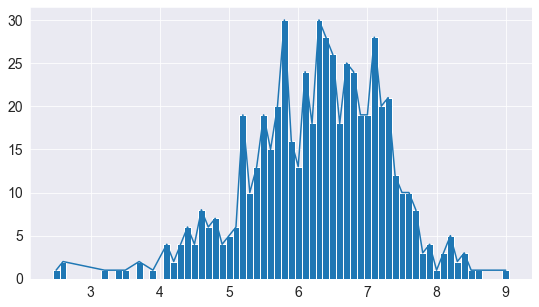

In [123]:
plt.bar(df["IMDB Score"].unique(), score_count, width=0.1)
plt.plot(df["IMDB Score"].unique(), df.groupby("IMDB Score")["IMDB Score"].count());

Observation: Most of the movies were given IMDB Score in range [5, 8]

**Score vs Runtime Using Lineplot** 

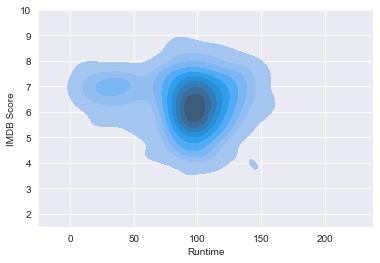

In [207]:
sns.kdeplot(x="Runtime",y="IMDB Score",data=df, shade=True, fill=True);
#sns.scatterplot(df["Runtime"], df["IMDB Score"])

Observation: Most of the movies which had medium IMDB Scores had run time of about 100 minutes. In other words, majority of movies had about 100 minutes of run time.

**Score vs Premiere Date Using Scatter Plot** 

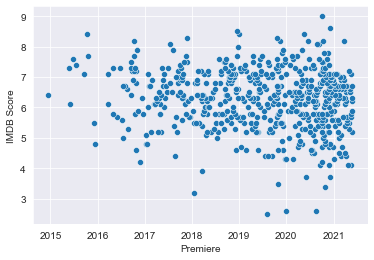

In [210]:
sns.scatterplot(x="Premiere", y="IMDB Score", data=df);

Observation: Premiere date has no directly influence towards IMDB score. The pattern shown in scatter plot above might due to most movies collected were premiered between 2018 and 2021.

**Genre vs Score Using Combination of Bar Plot and Line Plot** 

In [306]:
# note that the value in column all_genres are list
# we would like to get all values instead of list
def get_genre_from_list(col):
    result = []
    
    # loop over list in every row
    for n in col:
        # if the list only contains one element, append it
        if len(n)==1:
            result.append(n[0])
        # loop throught the list and append all elements
        else:
            for i in range(len(n)):
                result.append(n[i])
        
    return result

# get values from list in each row
a = pd.DataFrame(get_genre_from_list(df["all_genres"]), columns=["Genre"])
# count frequency of each genre
a = a.groupby("Genre")["Genre"].count()
b = pd.DataFrame({"Genre": a.index, "Count": a.values})

<AxesSubplot:xlabel='Genre'>

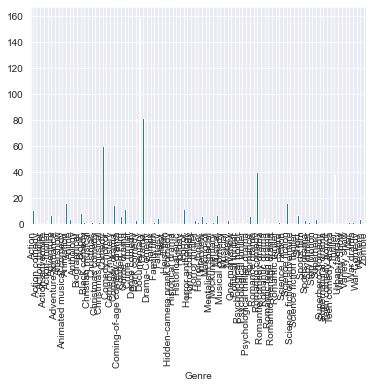

In [261]:
fig, ax = plt.subplots(1, len(b))

for i, count in enumerate(b):
    df[categorical_feature].value_counts().plot(kind="bar", ax=ax[i]).set_title(categorical_feature)

**Pairplot and Heatmap** 

<AxesSubplot:>

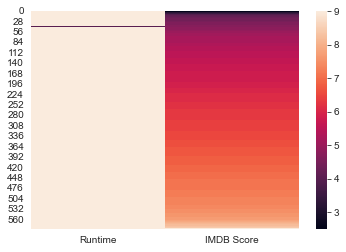

In [288]:
sns.heatmap(df_numerical, vmax=9)

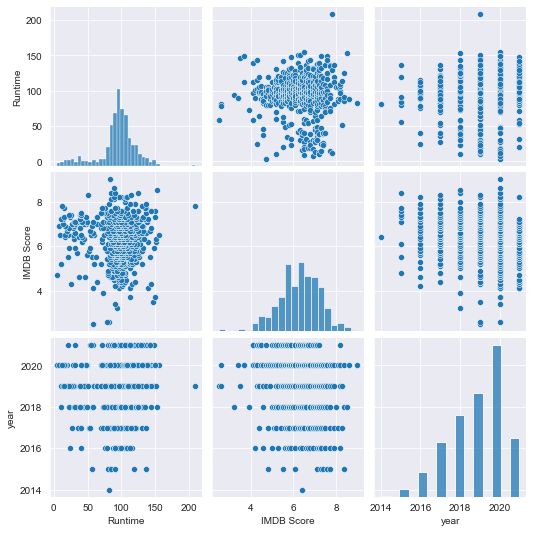

In [289]:
sns.pairplot(df)

Let us save and upload our work to Jovian before continuing

In [25]:
import jovian

In [26]:
jovian.commit()

<IPython.core.display.Javascript object>

[jovian] Attempting to save notebook..
[jovian] Updating notebook "aakashns/zerotopandas-course-project-starter" on https://jovian.ml/
[jovian] Uploading notebook..
[jovian] Capturing environment..
[jovian] Committed successfully! https://jovian.ml/aakashns/zerotopandas-course-project-starter


'https://jovian.ml/aakashns/zerotopandas-course-project-starter'

#### Q1: Had premiere date influenced the IMDB score of movies? If so, which period had most movies with high scores?

Recall our scatter plot of IMDB Score vs Premiere above


We have no evidence to prove that Date of Premiere directly influence IMDB Score. The above scatter plot did not convey anything meaningful about the relationship between Date of Premiere and IMDB Score. It might be the case that most movies in the data are between 2018 and 2021. Let's verify.

In [214]:
# retireve movies' year
df["year"] = df["Premiere"].dt.year
df.head()

,Title,Premiere,Runtime,IMDB Score,all_genres,all_languages,year
0,Enter the Anime,2019-08-05,58,2.5,[Documentary],"[English, Japanese]",2019
1,Dark Forces,2020-08-21,81,2.6,[Thriller],[Spanish],2020
2,The App,2019-12-26,79,2.6,"[Science fiction, Drama]",[Italian],2019
3,The Open House,2018-01-19,94,3.2,[Horror thriller],[English],2018
4,Kaali Khuhi,2020-10-30,90,3.4,[Mystery],[Hindi],2020


In [216]:
df_by_month = df.groupby("year")["year"].count()
df_by_month

year
2014      1
2015      9
2016     30
2017     66
2018     99
2019    125
2020    183
2021     71
Name: year, dtype: int64

<AxesSubplot:xlabel='year', ylabel='year'>

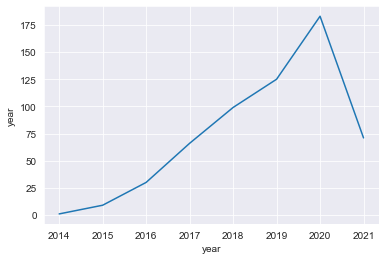

In [227]:
sns.lineplot(data=df_by_month)

<AxesSubplot:xlabel='year', ylabel='year'>

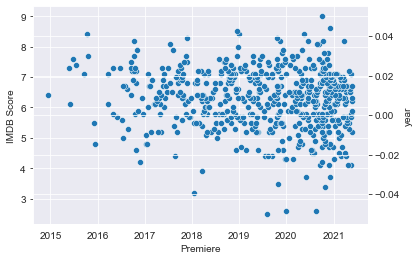

In [234]:

sns.scatterplot(x="Premiere", y="IMDB Score", data=df)
sns.lineplot(x="year", y=df.groupby("year")["year"].count(), data=df)

Let us save and upload our work to Jovian before continuing.

In [28]:
import jovian

In [29]:
jovian.commit()

<IPython.core.display.Javascript object>

[jovian] Attempting to save notebook..
[jovian] Updating notebook "aakashns/zerotopandas-course-project-starter" on https://jovian.ml/
[jovian] Uploading notebook..
[jovian] Capturing environment..
[jovian] Committed successfully! https://jovian.ml/aakashns/zerotopandas-course-project-starter


'https://jovian.ml/aakashns/zerotopandas-course-project-starter'

In [30]:
import jovian

In [31]:
jovian.commit()

<IPython.core.display.Javascript object>

[jovian] Attempting to save notebook..
[jovian] Updating notebook "aakashns/zerotopandas-course-project-starter" on https://jovian.ml/
[jovian] Uploading notebook..
[jovian] Capturing environment..
[jovian] Committed successfully! https://jovian.ml/aakashns/zerotopandas-course-project-starter


'https://jovian.ml/aakashns/zerotopandas-course-project-starter'